In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import rnn


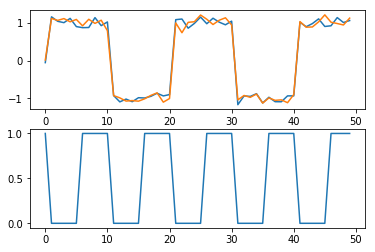

In [2]:
t = np.arange(50)*0.05
input_data = np.sign(np.array([np.sin(2*np.pi*t),np.sin(2*np.pi*t)]).T).astype(float)
input_data += np.random.normal(size=input_data.shape)*0.1
output_data = (np.sign(np.sin(2*np.pi*t*2+np.pi)).astype(float)+1)/2
plt.subplot(2,1,1)
plt.plot(input_data)
plt.subplot(2,1,2)
plt.plot(output_data)
plt.show()

In [3]:
epochs = 4000
n_classes = 1
n_units = 200
n_features = 2

In [4]:
X = tf.placeholder('float',[None,n_features])
Y = tf.placeholder('float')

weights = tf.Variable(tf.random_normal([n_units, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

x = tf.split(X, n_features, 1)
lstm_cell = rnn.BasicLSTMCell(n_units)    
outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)   
output = tf.matmul(outputs[-1], weights) + bias
output = tf.reshape(output, [-1])


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

with tf.Session() as sess:

    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()

    for epoch in range(epochs):
        _, epoch_loss = sess.run([optimizer, cost], feed_dict={X: input_data, Y: output_data})

        if epoch % 100 == 0:
            print('Epoch', epoch, 'completed out of', epochs, 'loss:', epoch_loss)

    pred = tf.round(tf.nn.sigmoid(output)).eval({X: input_data})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.
Epoch 0 completed out of 4000 loss: 0.69676155
Epoch 100 completed out of 4000 loss: 0.6411011
Epoch 200 completed out of 4000 loss: 0.6785444
Epoch 300 completed out of 4000 loss: 0.69727814
Epoch 400 completed out of 4000 loss: 0.6768922
Epoch 500 completed out of 4000 loss: 0.70610636
Epoch 600 completed out of 4000 loss: 0.68293816
Epoch 700 completed out of 4000 loss: 0.6853009
Epoch 800 completed out of 4000 loss: 0.6911051
Epoch 900 completed out of 4000 loss: 0.6574652
Epoch 1000 completed out of 4000 loss: 0.6714137
Epoch 1100 completed out of 4000 loss: 0.6766636
Epoch 1200 completed out of 4000 loss: 0.6561303
Epoch 1300 co

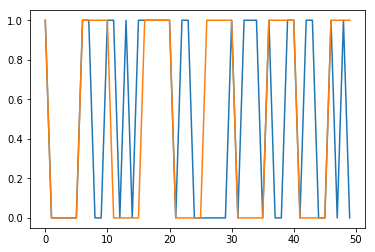

In [5]:
plt.plot(pred)
plt.plot(output_data)